In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from nilearn import datasets
from nilearn.plotting import (plot_anat, plot_epi, plot_roi,
                              plot_glass_brain, plot_stat_map,
                              plot_surf_stat_map, plot_img_on_surf)
from nilearn.image import mean_img
from nilearn.surface import vol_to_surf
from nilearn.masking import apply_mask

In [2]:
### SET DATA DIR

In [3]:
haxby_dataset = datasets.fetch_haxby(fetch_stimuli=True)

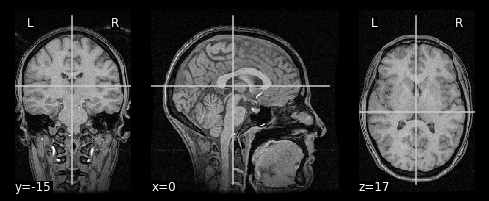

In [4]:
plot_anat(haxby_dataset.anat[0], vmin=0, vmax=200)

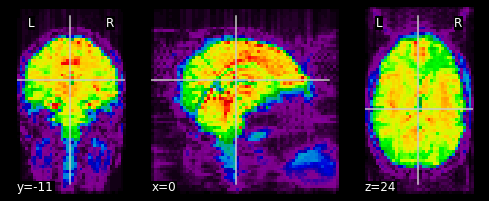

In [5]:
plot_epi(mean_img(haxby_dataset.func[0]))

In [6]:
mask_vt = haxby_dataset.mask_vt[0]
mask_face = haxby_dataset.mask_face[0]
mask_house = haxby_dataset.mask_house[0]

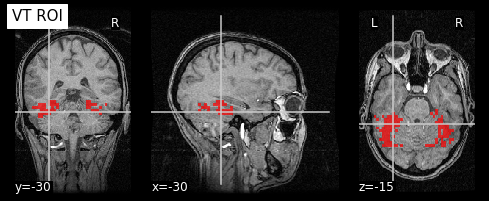

In [7]:
cut_coords = (-30, -30, -15)
plot_roi(mask_vt, bg_img=haxby_dataset.anat[0], cut_coords=cut_coords,
         dim=-1.3, cmap='bwr_r', title='VT ROI')

/Users/snastase/miniconda3/envs/neu502b/lib/python3.8/site-packages/nilearn/plotting/displays.py:97: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


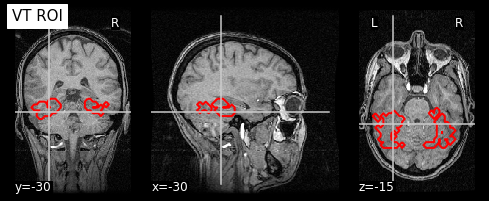

In [8]:
vmin, vmax = 0, 200
cut_coords = (-30, -30, -15)
anat_fig = plot_anat(haxby_dataset.anat[0], vmin=vmin, vmax=vmax,
                     cut_coords=cut_coords, title='VT ROI')
anat_fig.add_contours(mask_vt, antialiased=True, linewidths=2,
                      levels=0, colors='red')

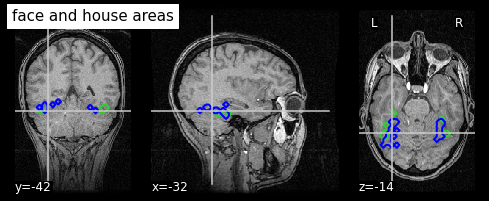

In [9]:
vmin, vmax = 0, 200
cut_coords = (-32, -42, -14)
anat_fig = plot_anat(haxby_dataset.anat[0], vmin=vmin, vmax=vmax,
                     cut_coords=cut_coords, title='face and house areas')
anat_fig.add_contours(mask_face, antialiased=True, linewidths=2,
                      levels=0, colors='limegreen')
anat_fig.add_contours(mask_house, antialiased=True, linewidths=2,
                      levels=0, colors='blue')

In [10]:
face_data = apply_mask(haxby_dataset.func[0], mask_face)
house_data = apply_mask(haxby_dataset.func[0], mask_house)

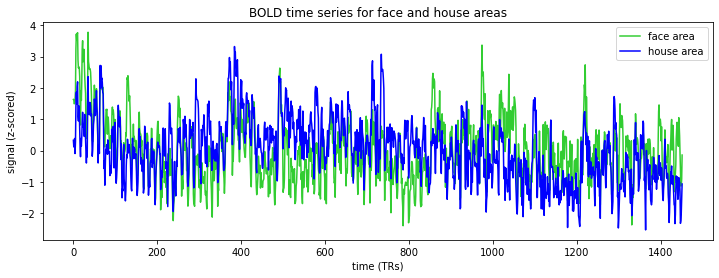

In [11]:
face_ts = zscore(np.mean(face_data, axis=1))
house_ts = zscore(np.mean(house_data, axis=1))

fig = plt.figure(figsize=(12, 4))
plt.plot(face_ts, color='limegreen')
plt.plot(house_ts, color='blue')
plt.xlabel('time (TRs)')
plt.ylabel('signal (z-scored)')
plt.title('BOLD time series for face and house areas')
plt.legend(['face area', 'house area'])

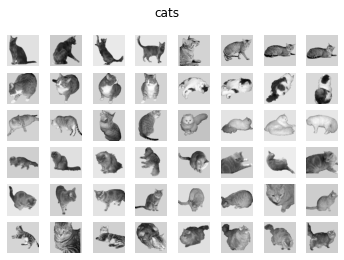

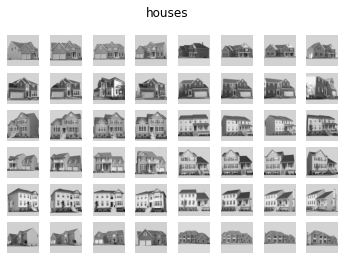

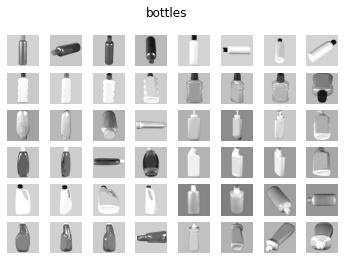

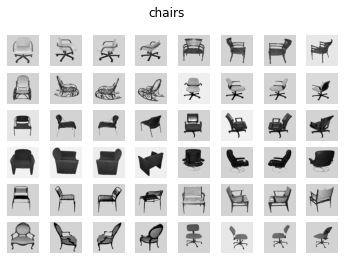

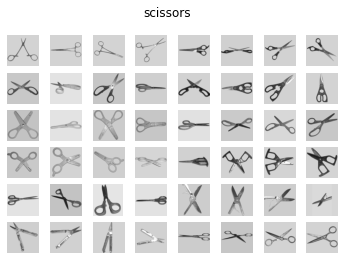

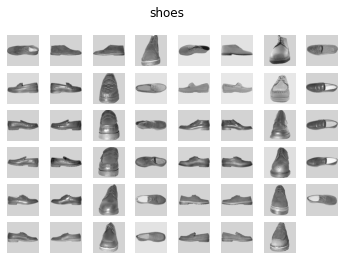

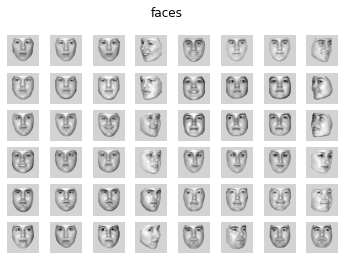

In [13]:
haxby_stimuli = haxby_dataset.stimuli
for stimulus_category in haxby_stimuli:
    
    # Skip control images (there are too many)
    if stimulus_category != 'controls':

        filenames = haxby_stimuli[stimulus_category]
        fig, axes = plt.subplots(6, 8)
        fig.suptitle(stimulus_category)
        for img_path, ax in zip(filenames, axes.ravel()):
            ax.imshow(plt.imread(img_path), cmap=plt.cm.gray)
        for ax in axes.ravel():
            ax.axis("off")

In [14]:
motor_dataset = datasets.fetch_neurovault_motor_task()

In [15]:
motor_stat = motor_dataset.images[0]

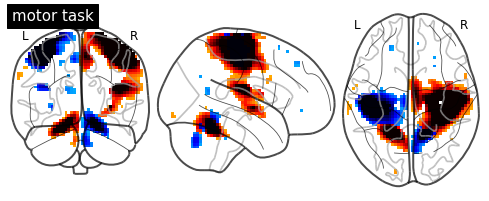

In [16]:
z_threshold = 3
plot_glass_brain(motor_stat, threshold=z_treshold,
                 plot_abs=False, title='motor task');

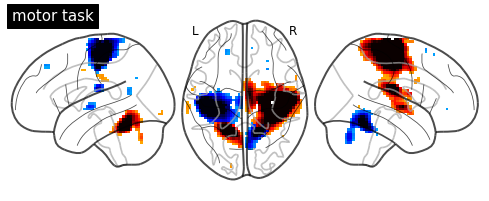

In [18]:
z_threshold = 3
display_mode = 'lzr'
plot_glass_brain(motor_stat, threshold=z_threshold, plot_abs=False,
                 display_mode=display_mode, title='motor task');

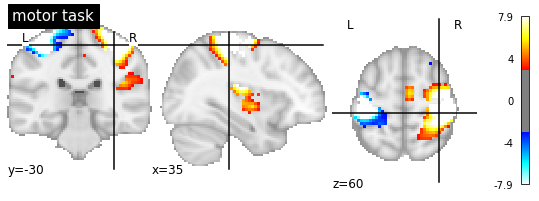

In [19]:
cut_coords = (35, -30, 60)
z_threshold = 3
plot_stat_map(motor_stat, threshold=z_threshold,
              cut_coords=cut_coords, title="motor task")

In [20]:
fsaverage = datasets.fetch_surf_fsaverage('fsaverage5')

In [21]:
motor_surf = vol_to_surf(motor_stat, fsaverage.pial_right)

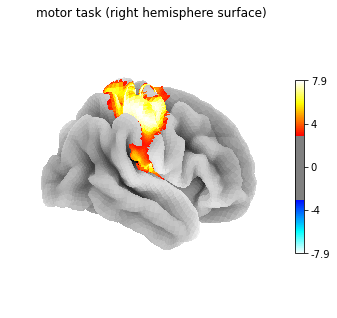

In [22]:
z_threshold = 3
plot_surf_stat_map(fsaverage.pial_right, motor_surf,
                   hemi='right', colorbar=True,
                   title='motor task (right hemisphere surface)',
                   threshold=3, bg_map=fsaverage.sulc_right);